In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('C:\\Users\\tremm\\Stat-Project\\heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

# Data Cleaning

In [ ]:
# check for missing values
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [ ]:
# check for duplictate rows
data.duplicated().any()

False

# Data Exploration

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


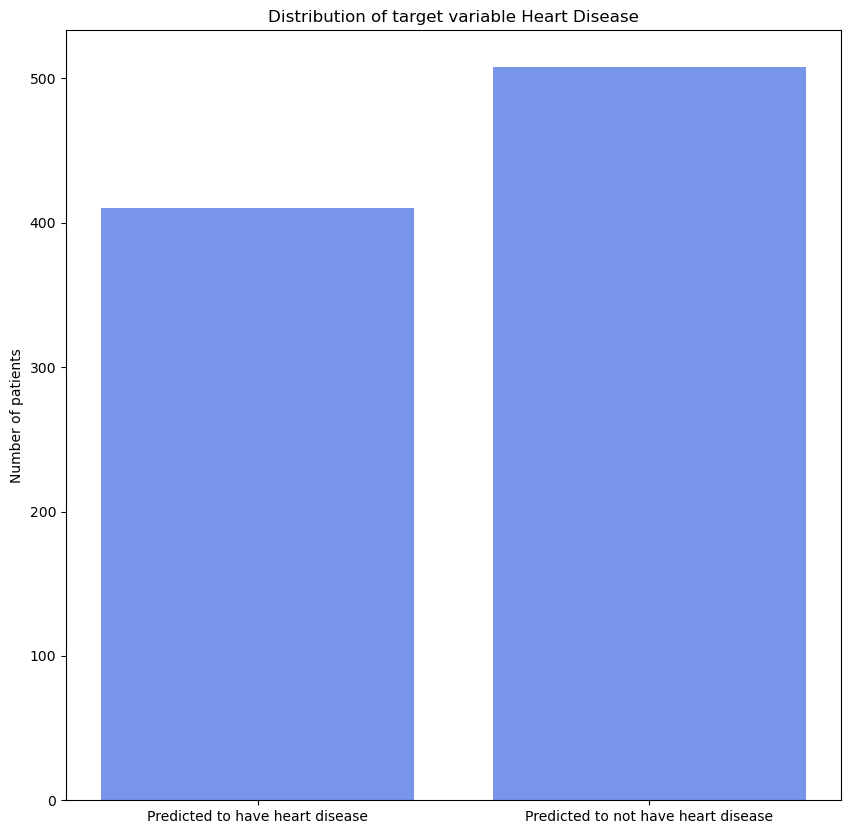

In [ ]:
# plot distrobution of target variable
plt.figure(figsize=(10,10))
agg_data = data.groupby(['HeartDisease'])['HeartDisease'].count()
plt.bar(['Predicted to have heart disease', 'Predicted to not have heart disease'],agg_data, color='royalblue', alpha=0.7)
plt.title('Distribution of target variable Heart Disease')
plt.ylabel('Number of patients')
plt.show()

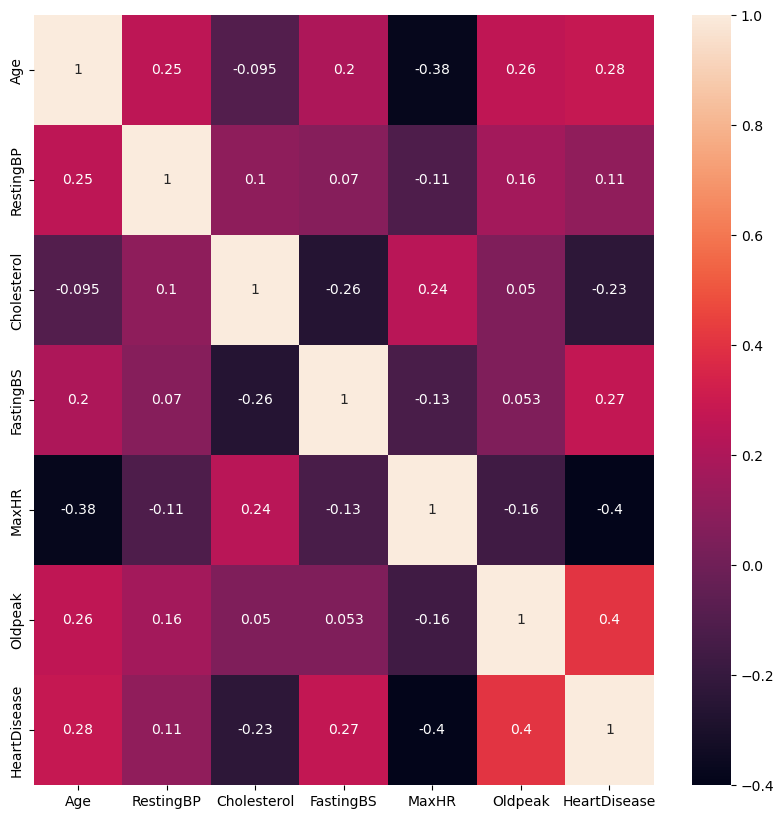

In [ ]:
plt.figure(figsize=(10,10))
hmap = sb.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# create dummy variables for categorical variables
# see possible values for each categotical variable
print(f'Sex values: {data["Sex"].unique()}')
print(f'Chest Pain Type values: {data["ChestPainType"].unique()}')
print(f'Resting ECG values: {data["RestingECG"].unique()}')
print(f'Exercise Angina values: {data["ExerciseAngina"].unique()}')
print(f'ST Slope values: {data["ST_Slope"].unique()}')


Sex values: ['M' 'F']
Chest Pain Type values: ['ATA' 'NAP' 'ASY' 'TA']
Resting ECG values: ['Normal' 'ST' 'LVH']
Exercise Angina values: ['N' 'Y']
ST Slope values: ['Up' 'Flat' 'Down']


In [ ]:
# create dummy variables and ignore first on binary variables to prevent multicolinearity
sex_converted = pd.get_dummies(data['Sex'], drop_first=True)
chest_pain_converted = pd.get_dummies(data['ChestPainType'])
ecg_converted = pd.get_dummies(data['RestingECG'])
exercise_converted = pd.get_dummies(data['ExerciseAngina'], drop_first=True)
st_slope_converted = pd.get_dummies(data['ST_Slope'])

# add new variables to dataframe
data = pd.concat([data, sex_converted,chest_pain_converted,ecg_converted,exercise_converted,st_slope_converted], axis= 1)
print(data.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'M', 'ASY', 'ATA', 'NAP', 'TA', 'LVH', 'Normal', 'ST',
       'Y', 'Down', 'Flat', 'Up'],
      dtype='object')


In [ ]:
# drop old categorical varibles
data.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)

# Training The models

In [ ]:
# split dataset to training and testing
y_data = data['HeartDisease']
x_data = data.drop('HeartDisease', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test = train_test_split(x_data, y_data, test_size= 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)

log_reg.fit(x_training, y_training)

LogisticRegression(max_iter=2000)

In [ ]:
pred = log_reg.predict(x_test)
pred_prob = log_reg.predict_proba(x_test)[::,1]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       125
           1       0.87      0.89      0.88       151

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[103  21]
 [ 12 140]]


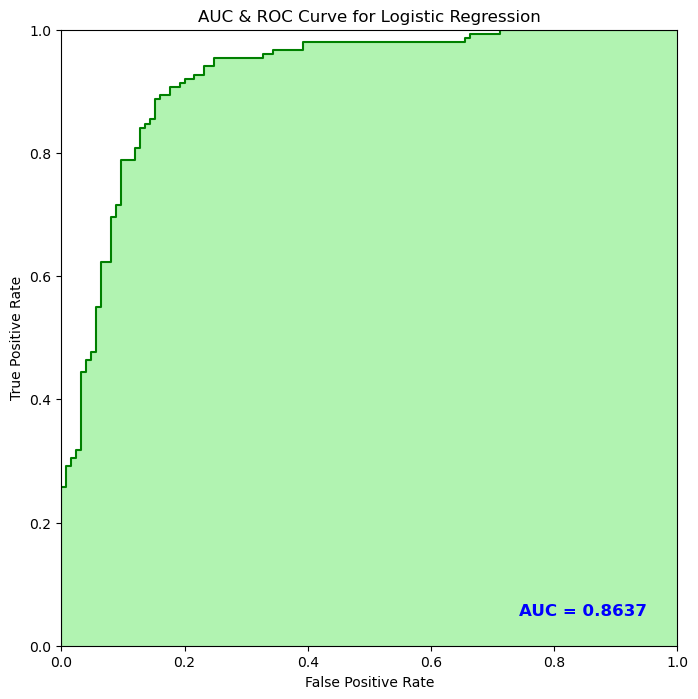

In [ ]:
# ROC and AUC plot
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred)

fpr, tpr, thresolds = metrics.roc_curve(y_test, pred_prob)

# plot curve
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for Logistic Regression")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Using LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda =  LinearDiscriminantAnalysis()

lda.fit(x_training, y_training)

LinearDiscriminantAnalysis()

In [ ]:
lda_pred = lda.predict(x_test)
lda_probs = lda.predict_proba(x_test)[::,1]

In [ ]:
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       125
           1       0.87      0.89      0.88       151

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [ ]:
print(confusion_matrix(y_test, lda_pred))

[[105  20]
 [ 16 135]]


In [ ]:
lda_probs.size

276

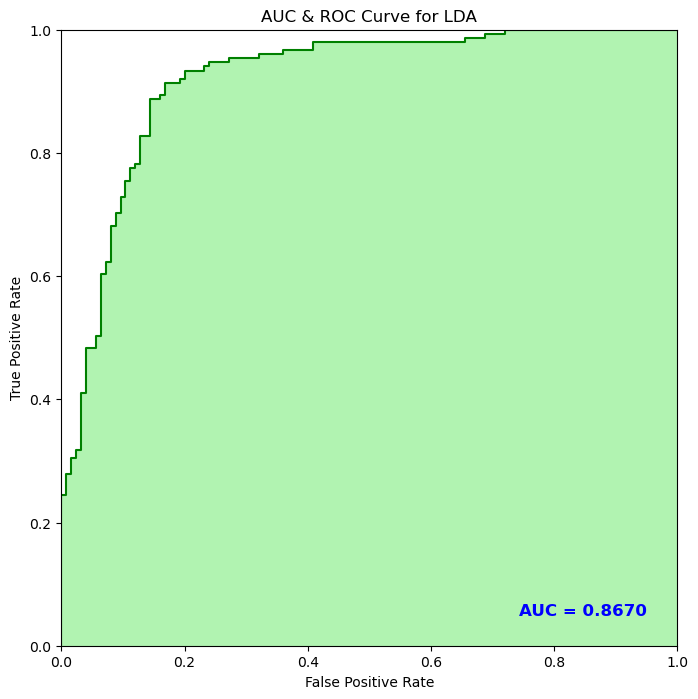

In [ ]:
auc = metrics.roc_auc_score(y_test, lda_pred)

fpr, tpr, thresolds = metrics.roc_curve(y_test, lda_probs)

# plot curve
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for LDA")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Using QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(x_training, y_training)

C:\Users\tremm\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
qda_pred = qda.predict(x_test)
qda_prob = qda.predict_proba(x_test)[::,1]

In [ ]:
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       125
           1       0.77      0.81      0.79       151

    accuracy                           0.76       276
   macro avg       0.76      0.76      0.76       276
weighted avg       0.76      0.76      0.76       276



In [ ]:
print(confusion_matrix(y_test, qda_pred))

[[ 88  37]
 [ 28 123]]


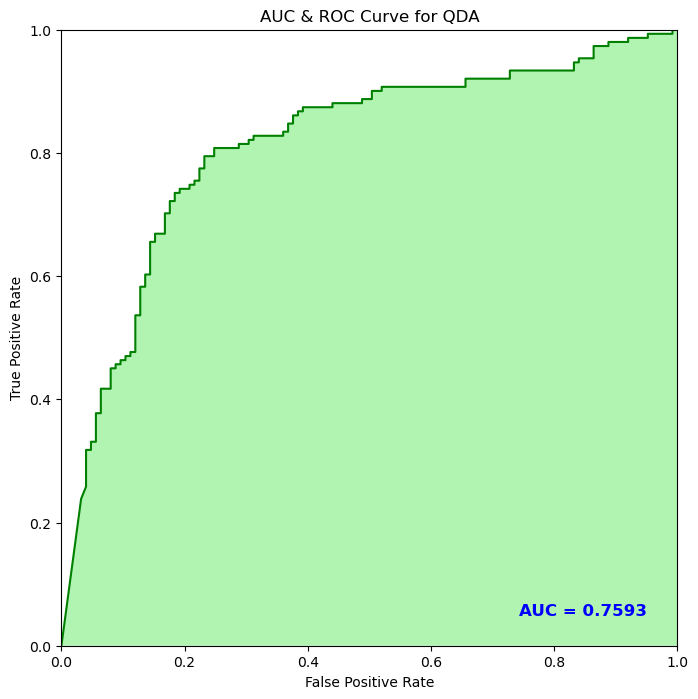

In [ ]:
auc = metrics.roc_auc_score(y_test, qda_pred)

fpr, tpr, thresolds = metrics.roc_curve(y_test, qda_prob)

# plot curve
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for QDA")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=1, bootstrap=False)

rf_params = {"n_estimators": [50, 100, 500]}
grid_search_rf = GridSearchCV(rf, param_grid=rf_params, scoring='accuracy')
grid_result_rf = grid_search_rf.fit(x_training,y_training)

In [ ]:
print(f'Best score: {grid_result_rf.best_score_} using parameters: {grid_result_rf.best_params_}')

Best score: 0.8706637596899224 using parameters: {'n_estimators': 500}


In [ ]:
# Train RF with grid search param and test
rf = RandomForestClassifier(random_state= 1, bootstrap=False, n_estimators=500)

rf_model = rf.fit(x_training, y_training)


In [ ]:
rf_pred = rf_model.predict(x_test)
rf_prob = rf_model.predict_proba(x_test)[::,1]
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       125
           1       0.83      0.89      0.86       151

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [ ]:
print(confusion_matrix(y_test, rf_pred))

[[ 98  27]
 [ 17 134]]


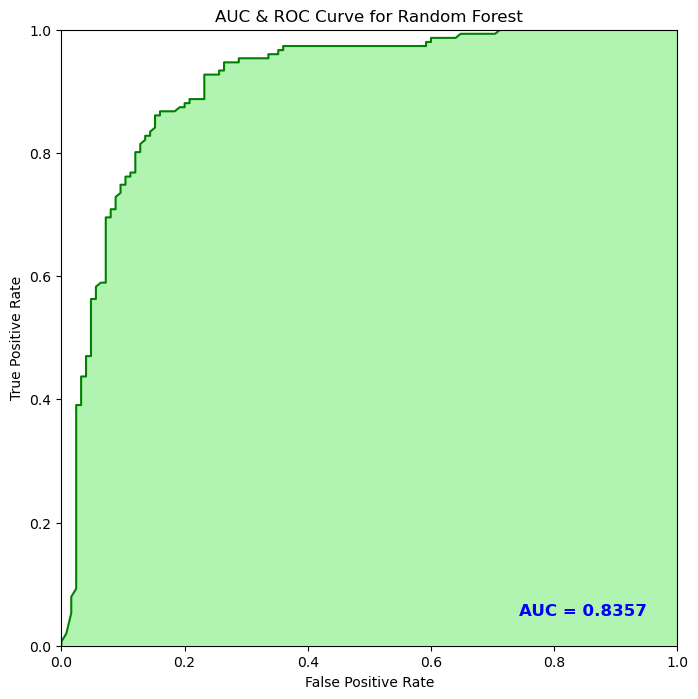

In [ ]:
auc = metrics.roc_auc_score(y_test, rf_pred)

fpr, tpr, thresolds = metrics.roc_curve(y_test, rf_prob)

# plot curve
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for Random Forest")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(random_state=1)

bag_params = {"n_estimators": [50, 100, 500]}
grid_search_bag = GridSearchCV(bag, param_grid=bag_params, scoring='accuracy')
grid_result_bag = grid_search_bag.fit(x_training,y_training)

In [ ]:
print(f'Best score: {grid_result_bag.best_score_} using parameters: {grid_result_bag.best_params_}')

Best score: 0.8519743217054263 using parameters: {'n_estimators': 100}


In [ ]:
bag = BaggingClassifier(random_state=1, n_estimators=100)
bag_model = bag.fit(x_training, y_training)

In [ ]:
bag_pred = bag_model.predict(x_test)
bag_prob = bag_model.predict_proba(x_test)[::,1]

In [ ]:
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       125
           1       0.82      0.89      0.86       151

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



In [ ]:
print(confusion_matrix(y_test, bag_pred))

[[ 96  29]
 [ 16 135]]


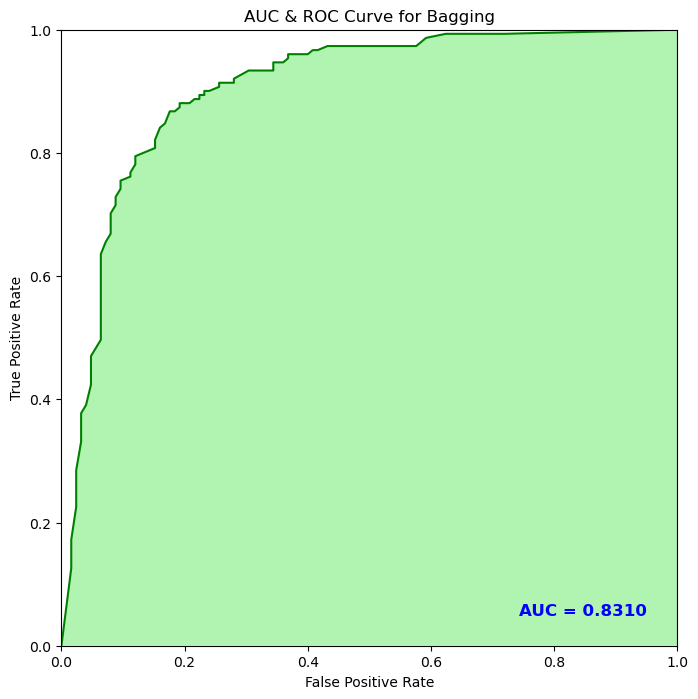

In [ ]:
auc = metrics.roc_auc_score(y_test, bag_pred)

fpr, tpr, thresolds = metrics.roc_curve(y_test, bag_prob)

# plot curve
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for Bagging")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=1)

ada_params = {
    "n_estimators": [50, 100, 500],
    "learning_rate": [000.1,00.1,0.1,1]
    }
grid_search_ada = GridSearchCV(ada, param_grid=ada_params, scoring='accuracy')
grid_result_ada = grid_search_ada.fit(x_training,y_training)

In [ ]:
print(f'Best score: {grid_result_ada.best_score_} using parameters: {grid_result_ada.best_params_}')

Best score: 0.8582606589147286 using parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [ ]:
ada = AdaBoostClassifier(random_state=1, n_estimators=50, learning_rate=0.1)

ada_model = ada.fit(x_training, y_training)


In [ ]:
ada_pred = ada_model.predict(x_test)
ada_prob = ada_model.predict_proba(x_test)[::,1]

In [ ]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       125
           1       0.88      0.90      0.89       151

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.88       276
weighted avg       0.88      0.88      0.88       276



In [ ]:
print(confusion_matrix(y_test, ada_pred))

[[106  19]
 [ 15 136]]


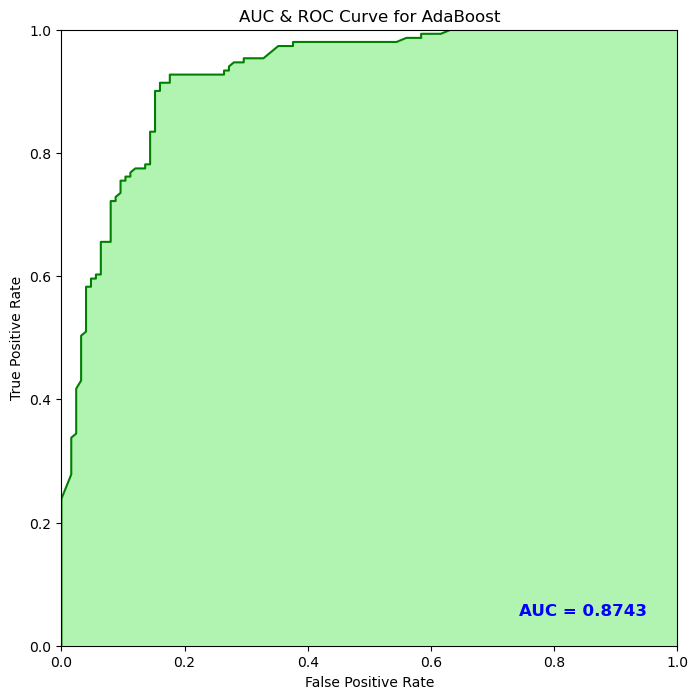

In [ ]:
auc = metrics.roc_auc_score(y_test, ada_pred)

fpr, tpr, thresolds = metrics.roc_curve(y_test, ada_prob)

# plot curve
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for AdaBoost")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()